Offshore Gauge 

<Figure size 1000x800 with 0 Axes>

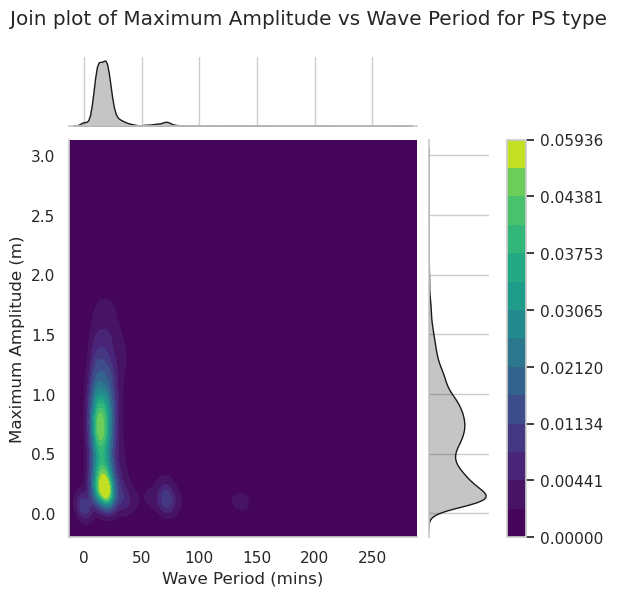

<Figure size 1000x800 with 0 Axes>

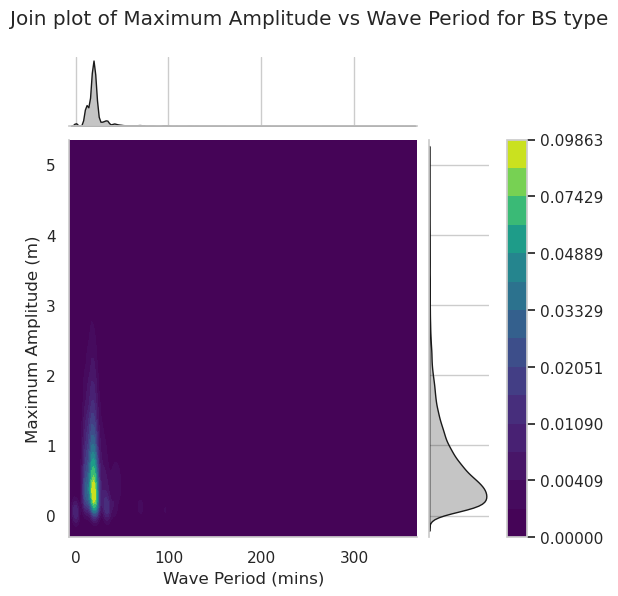

<Figure size 1000x800 with 0 Axes>

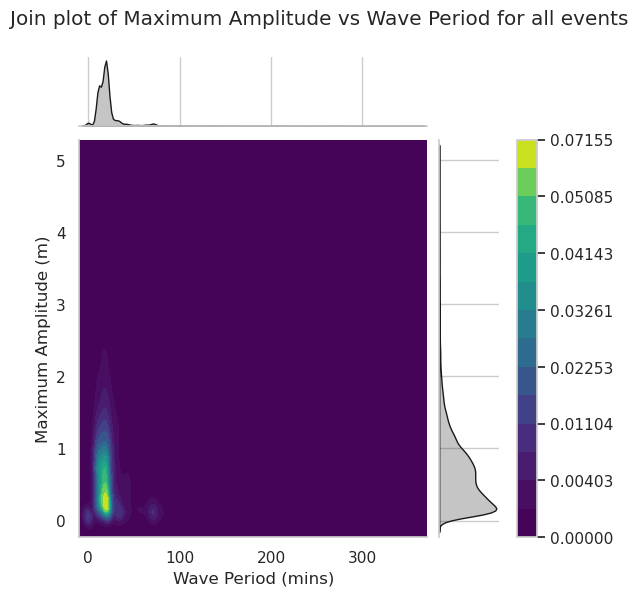

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Load data from your selected station
max_amp_file = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/grid0_allpts87_alleve53550.offshore.txt'
waveperiod_file = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/info/grid0_allpts87_alleveWP53550.offshore.txt'

df_amp = pd.read_csv(max_amp_file, sep='\t')
df_wp = pd.read_csv(waveperiod_file, sep='\t')

st = 40

# Extract the data for the selected station
id = df_amp.iloc[:, 0]
max_amp = df_amp.iloc[:, st + 1]
waveperiod = df_wp.iloc[:, st + 1]

# Create a DataFrame for the selected station
df = pd.DataFrame({'id': id, 'max_amp': max_amp, 'waveperiod': waveperiod})

# Split the first 2 characters of id into a new column 'type'
df['type'] = df['id'].str[:2]

# Define the number of bins for your heatmap
num_bins = 15

# Create a heatmap for each 'type' using hue as quantiles
types = ['PS', 'BS']
for type in types:
    station_df = df[df['type'] == type]
    station_df = station_df[['max_amp', 'waveperiod']]
    
    plt.figure(figsize=(10, 8))
    kdeplot = sns.jointplot(station_df, x='waveperiod', y='max_amp', kind='kde', color='k', fill=True, thresh=0, levels=num_bins, cmap='viridis', cbar=True)
    # Move colorbar to the right
    plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)
    # get the current positions of the joint ax and the ax for the marginal x
    pos_joint_ax = kdeplot.ax_joint.get_position()
    pos_marg_x_ax = kdeplot.ax_marg_x.get_position()
    # reposition the joint ax so it has the same width as the marginal x ax
    kdeplot.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width, pos_joint_ax.height])
    # reposition the colorbar using new x positions and y positions of the joint ax
    kdeplot.fig.axes[-1].set_position([.83, pos_joint_ax.y0, .07, pos_joint_ax.height])
    kdeplot.fig.suptitle('Join plot of Maximum Amplitude vs Wave Period for ' + type + ' type')
    plt.xlabel('Wave Period (mins)')
    plt.ylabel('Maximum Amplitude (m)')
    plt.show()


# Create a heatmap for all 'types' with color split across quantiles
plt.figure(figsize=(10, 8))
all_types_df = df
kdeplot = sns.jointplot(all_types_df, x='waveperiod', y='max_amp', kind='kde', color='k', fill=True, thresh=0, levels=num_bins, cmap='viridis', cbar=True)
# Move colorbar to the right
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)
# get the current positions of the joint ax and the ax for the marginal x
pos_joint_ax = kdeplot.ax_joint.get_position()
pos_marg_x_ax = kdeplot.ax_marg_x.get_position()
# reposition the joint ax so it has the same width as the marginal x ax
kdeplot.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width, pos_joint_ax.height])
# reposition the colorbar using new x positions and y positions of the joint ax
kdeplot.fig.axes[-1].set_position([.83, pos_joint_ax.y0, .07, pos_joint_ax.height])
kdeplot.fig.suptitle('Join plot of Maximum Amplitude vs Wave Period for all events')
plt.xlabel('Wave Period (mins)')
plt.ylabel('Maximum Amplitude (m)')
plt.show()


<Figure size 1000x800 with 0 Axes>

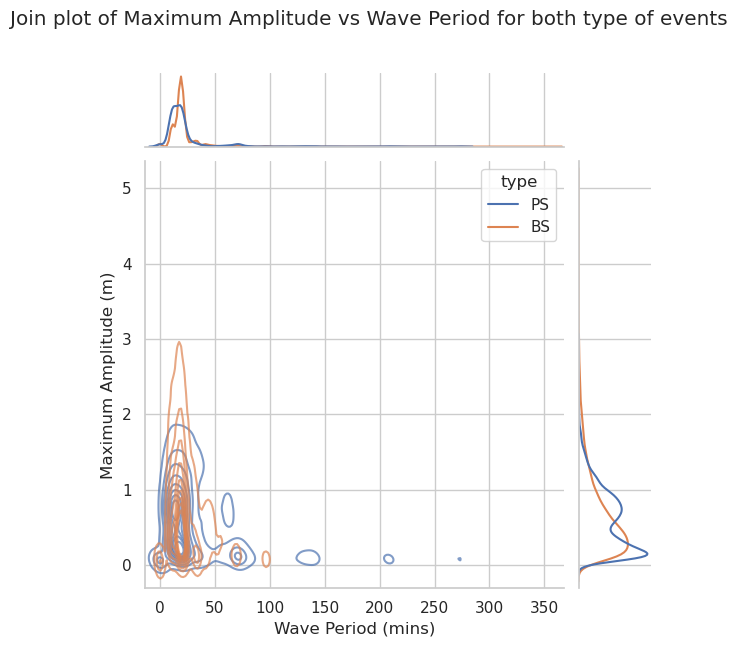

In [80]:
# Create a heatmap for all 'types' with color split across quantiles
plt.figure(figsize=(10, 8))
all_types_df = df
kdeplot = sns.jointplot(all_types_df, x='waveperiod', y='max_amp',hue="type",kind='kde', color='k', alpha = 0.7)
plt.xlabel('Wave Period (mins)')
plt.ylabel('Maximum Amplitude (m)')
kdeplot.fig.suptitle('Join plot of Maximum Amplitude vs Wave Period for both type of events', y=1.075)
plt.show()

Polarity

In [ ]:
file = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/simu/old/PS_manning003/E01517N3917E01678N3772-PS-Mur_PNo_Hom-M792_E01620N3835_S000/grid0_ts.nc'
import xarray as xr
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#read data
data = xr.open_dataset(file)
depth = data['deformed_bathy'].values
ts = data['eta'].values
maxTS = ts.max(axis=0)
minTS = ts.min(axis=0)
gperiod = []
gpolarity = []
greturn_code = []

for g in range(87):
    #find peaks(positive and negative)
    ppeaks, _ = scipy.signal.find_peaks(ts[:,g], height=0.05,distance=50)
    npeaks, _ = scipy.signal.find_peaks(-ts[:,g], height=0.05,distance=50)

    #find polarity of wave based on positive and negative peaks indices
    if len(ppeaks)==0 and len(npeaks)==0:
        polarity = '0'
    elif len(ppeaks)==0:
        polarity = '-1'
    elif len(npeaks)==0:
        polarity = '+1'
    elif ppeaks[0]<npeaks[0]:
        polarity = '+1'
    elif ppeaks[0]>npeaks[0]:
        polarity = '-1'
    else:
        polarity = '0'

    #find waveperiod
    if polarity == '0':
        waveperiod = 0
    elif polarity == '+1':
        waveperiod = (ppeaks[1]-ppeaks[0])*30
    elif polarity == '-1':
        waveperiod = (npeaks[1]-npeaks[0])*30

    #return code
    if polarity == '0':
        return_code = 1
    elif polarity == '+1' or polarity == '-1':
        return_code = 3

    gperiod.append(waveperiod)
    gpolarity.append(polarity)
    greturn_code.append(return_code)

gperiod = np.array(gperiod)
gpolarity = np.array(gpolarity)
greturn_code = np.array(greturn_code)


#compile to dataframe #ID lon lat depth max_ssh min_ssh period polarity return_code
df = pd.DataFrame({'ID':np.arange(87)+1,
                    'lon':data['longitude'].values,
                    'lat':data['latitude'].values,
                    'depth':data['deformed_bathy'].values,
                    'max_ssh':maxTS,
                    'min_ssh':minTS,
                    'period':gperiod,
                    'polarity':gpolarity,
                    'return_code':greturn_code})


Event Rates

In [ ]:
import pandas as pd
file_list = ['/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/resources/processed/eve_rate/med09159_BS_mih1.0-4.0_probs99ALL.txt',
            '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/resources/processed/eve_rate/med09159_PS_mih1.0-4.0_probs99ALL.txt',
            '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/resources/processed/eve_rate/med09174_BS_probs99ALL.txt',
            '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/resources/processed/eve_rate/med09174_PS_probs99ALL.txt']
all_events = pd.DataFrame()

for f,file in enumerate(file_list):
    print(file)
    #read file and calculate mean probability for each event stored as a row( event_id, prob0....prob999)
    df = pd.read_csv(file, sep=',')
    # append first column and mean to a new dataframe
    df_mean = pd.DataFrame({'ID':df.iloc[:,0],
                        'mean_prob':df.iloc[:,1:].mean(axis=1)})
    #append to all_events
    all_events = pd.concat([all_events,df_mean],axis=0)
    del df, df_mean
    
#drop duplicates
all_events.drop_duplicates(subset='ID', keep='first', inplace=True)

#save to file
all_events.to_csv('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/resources/processed/all_eventsBS_PS53550_meanrate.txt', sep=',', index=False)

#read event info file
event_info = pd.read_csv('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/resources/processed/all_eventsBS_PS53550.txt',sep='\t')

#merge event info and mean rate
combined = pd.merge(event_info, all_events, on='ID', how='left')

#save to file
combined.to_csv('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/resources/processed/allinfo_eventsBS_PS53550.txt', sep=',', index=False)


check duplicates in id

In [ ]:
#check duplicates in id
len(all_events[all_events.duplicated(subset=['id'])])

#find one duplicate
all_events[all_events.duplicated(subset=['id'])].iloc[888,0]

#print one entry where id is 'E01267N3753E01646N3535-BS-M707_E01527N3715_D010_S067D50R090_A000668_S023'
all_events[all_events['id']==all_events[all_events.duplicated(subset=['id'])].iloc[2000,0]]

Check model parameters and size


In [1]:
from torchsummary import summary
import model_utils as utils
import torch
model = torch.load(f"/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/SR/out/model_coupled_off[64, 128, 256]_on[64, 64]_epoch_1000_900.pt",map_location=torch.device('cpu'))
model.eval()
# summary(model,[(5,480),(186181,)])
summary(model,[(5,480),(186181,)])

Autoencoder_coupled(
  (offshore_encoder): Sequential(
    (0): Conv1d(5, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): LeakyReLU(negative_slope=0.5, inplace=True)
    (2): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
    (3): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
    (4): LeakyReLU(negative_slope=0.5, inplace=True)
    (5): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
    (6): Conv1d(128, 256, kernel_size=(3,), stride=(1,), padding=(1,))
    (7): LeakyReLU(negative_slope=0.5, inplace=True)
    (8): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
    (9): Dropout(p=0.1, inplace=False)
    (10): Flatten(start_dim=1, end_dim=-1)
    (11): Linear(in_features=15360, out_features=64, bias=True)
  )
  (deform_encoder): Sequential(
    (0): Linear(in_features=186181, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): LeakyReLU(negati

In [ ]:
summary(model,[(5,480),(186181,)])